!pip install pycaret

pip install --ignore-installed pycaret --user

In [2]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [24]:
from google.colab import files
uploaded = files.upload()

Saving Training_Data_Fuel_Prices_Updated.csv to Training_Data_Fuel_Prices_Updated.csv


In [2]:
import pandas as pd
dataset = pd.read_csv('C:/Users/Vikram.V.Kumar/Desktop/SPA/Data/Training_Data_Fuel_Prices_Updated.csv')
dataset.head(4)


,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,Target,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,BP_Brnd Low,BP_Unbrd Avg,BP_Unbrd High,BP_Unbrd Low,rank_BP,day_of_week,month,day_of_month
0,0.0193,0.0168,0.0318,0.0185,0.0058,-0.0075,0.0024,0.0092,0.0042,0.021295,0.014478,0.026615,-0.016367,-0.0603,0.0327,5,2,1,3
1,0.0093,0.0018,-0.0094,0.0099,0.0086,-0.0052,0.0052,0.0092,0.0087,0.023539,0.016980,0.027250,-0.022075,-0.0553,0.0152,5,3,1,4
2,-0.0484,-0.0559,-0.0559,-0.0437,0.0064,-0.0021,0.0063,0.0141,0.0086,0.024766,0.017791,0.031750,0.002150,-0.0519,0.0391,5,4,1,5
3,0.0085,0.0410,0.0185,0.0115,-0.0010,-0.0067,-0.0018,0.0054,-0.0001,0.018111,0.015076,0.022700,0.003175,-0.0617,0.0409,2,0,1,8


In [26]:
import io
import pandas as pd
dataset = pd.read_csv(io.BytesIO(uploaded['Training_Data_Fuel_Prices_Updated.csv']))
dataset.head(4)

,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,Target,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,BP_Brnd Low,BP_Unbrd Avg,BP_Unbrd High,BP_Unbrd Low,rank_BP,day_of_week,month,day_of_month
0,0.0193,0.0168,0.0318,0.0185,0.0058,-0.0075,0.0024,0.0092,0.0042,0.021295,0.014478,0.026615,-0.016367,-0.0603,0.0327,5,2,1,3
1,0.0093,0.0018,-0.0094,0.0099,0.0086,-0.0052,0.0052,0.0092,0.0087,0.023539,0.016980,0.027250,-0.022075,-0.0553,0.0152,5,3,1,4
2,-0.0484,-0.0559,-0.0559,-0.0437,0.0064,-0.0021,0.0063,0.0141,0.0086,0.024766,0.017791,0.031750,0.002150,-0.0519,0.0391,5,4,1,5
3,0.0085,0.0410,0.0185,0.0115,-0.0010,-0.0067,-0.0018,0.0054,-0.0001,0.018111,0.015076,0.022700,0.003175,-0.0617,0.0409,2,0,1,8


In [4]:
dataset.shape

(624, 19)

In [5]:
data = dataset.sample(frac=0.9, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (562, 19)
Unseen Data For Predictions: (62, 19)


In [1]:
from pycaret.regression import *

In [6]:
exp_reg101 = setup(data = data, target = 'Target', session_id=123,
                   normalize = True, transformation = True, transform_target = True, 
                   combine_rare_levels = True, rare_level_threshold = 0.05,
                   remove_multicollinearity = True, multicollinearity_threshold = 0.95, 
                   #date_features= ['day_of_week','month','day_of_month'],
                   numeric_features= ['rank_BP'],
                   categorical_features = ['day_of_week','month','day_of_month']
                   ) 

 
Setup Succesfully Completed.


,Description,Value
0,session_id,123
1,Transform Target,True
2,Transform Target Method,yeo-johnson
3,Original Data,"(562, 19)"
4,Missing Values,True
5,Numeric Features,15
6,Categorical Features,3
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
compare_models(sort = 'MSE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,0.0062,0.0001,0.0097,0.9204,0.0090,0.3077,0.0135
1,Extra Trees Regressor,0.0062,0.0001,0.0102,0.9118,0.0095,0.1812,0.2952
2,Gradient Boosting Regressor,0.0065,0.0001,0.0108,0.9050,0.0100,0.2356,0.2089
3,Bayesian Ridge,0.0060,0.0001,0.0095,0.9225,0.0088,0.2188,0.0222
4,Least Angle Regression,0.0067,0.0001,0.0106,0.8998,0.0092,0.3144,0.0116
5,Orthogonal Matching Pursuit,0.0054,0.0001,0.0092,0.9227,0.0085,0.0544,0.0024
6,Ridge Regression,0.0061,0.0001,0.0096,0.9215,0.0089,0.2753,0.0070
7,Passive Aggressive Regressor,0.0070,0.0001,0.0108,0.9052,0.0099,0.4965,0.0074
8,Random Sample Consensus,0.0056,0.0001,0.0092,0.9256,0.0086,0.2181,0.3961
9,TheilSen Regressor,0.0057,0.0001,0.0092,0.9254,0.0086,0.1930,6.8743


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [8]:
XGBoost = create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0041,0.0000,0.0052,0.9768,0.0051,0.7191
1,0.0057,0.0000,0.0068,0.9555,0.0065,-0.1091
2,0.0050,0.0001,0.0075,0.9478,0.0064,-0.1155
3,0.0095,0.0003,0.0158,0.8909,0.0146,0.0774
4,0.0076,0.0002,0.0151,0.8744,0.0145,0.4261
5,0.0087,0.0003,0.0179,0.6817,0.0167,-0.2411
6,0.0061,0.0001,0.0095,0.9208,0.0091,-0.0389
7,0.0052,0.0001,0.0072,0.9642,0.0069,0.6516
8,0.0092,0.0002,0.0131,0.9031,0.0118,-0.5866
9,0.0059,0.0001,0.0104,0.9408,0.0097,1.0756


In [9]:
tuned_XGBoost = tune_model(XGBoost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0047,0.0000,0.0062,0.9669,0.0061,0.5800
1,0.0057,0.0000,0.0069,0.9541,0.0067,-0.2627
2,0.0051,0.0001,0.0071,0.9532,0.0058,-0.0358
3,0.0096,0.0003,0.0170,0.8739,0.0152,0.0970
4,0.0076,0.0002,0.0139,0.8946,0.0133,0.8638
5,0.0091,0.0003,0.0186,0.6593,0.0170,-0.0704
6,0.0060,0.0001,0.0093,0.9235,0.0089,-0.0298
7,0.0048,0.0000,0.0069,0.9669,0.0066,0.6490
8,0.0083,0.0001,0.0122,0.9164,0.0113,-1.2300
9,0.0057,0.0001,0.0093,0.9529,0.0088,2.9591


In [10]:
print(tuned_XGBoost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=110,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=0)


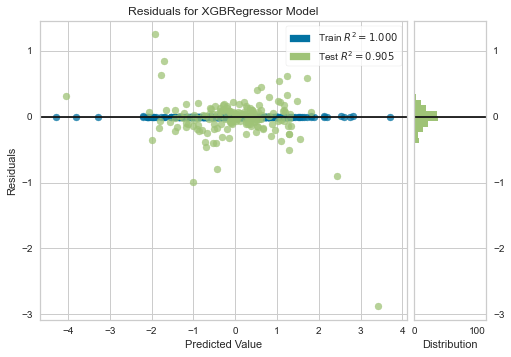

In [11]:
plot_model(tuned_XGBoost)

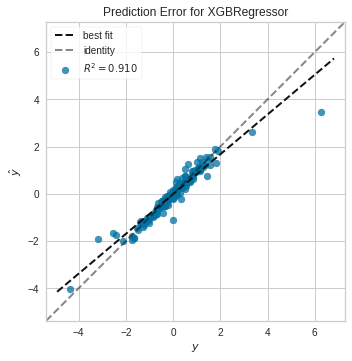

In [36]:
plot_model(tuned_XGBoost, plot = 'error')

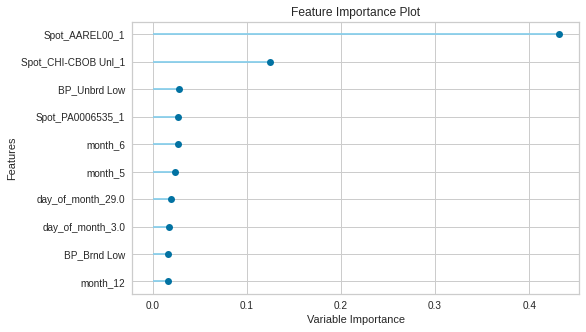

In [37]:
plot_model(tuned_XGBoost, plot = 'feature')

In [12]:
predict_model(tuned_XGBoost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.0069,0.0002,0.0123,0.9151,0.011,0 0.251683 dtype: float64


,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,...,day_of_month_3.0,day_of_month_30.0,day_of_month_4.0,day_of_month_5.0,day_of_month_6.0,day_of_month_8.0,day_of_month_9.0,day_of_month_others_infrequent,0,Label
0,1.140776,1.167366,1.009848,-0.265650,-0.103067,0.046200,0.226417,-0.087088,-1.192936,-1.176956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0439,0.0421
1,-0.579016,-1.305795,-0.884039,-0.172090,-0.063402,-0.187593,0.152009,-0.344585,-0.178692,-0.103959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0263,-0.0350
2,-1.523349,-1.633389,-1.619104,0.277137,0.437723,0.770581,0.590458,0.440280,0.856002,1.012901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0627,-0.0584
3,0.605254,0.786591,0.597837,0.578329,-0.282505,-0.358184,-0.253177,0.360742,0.385359,0.182751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0186,0.0212
4,0.402323,0.749186,0.638644,0.556894,0.367863,0.058492,0.107069,-0.028112,0.751124,1.153962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0149,0.0136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.393455,0.508175,0.332951,0.399225,0.581283,0.579671,0.388125,0.589428,1.010361,1.401850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0144,0.0098
165,1.891168,0.749186,1.004893,-0.640817,0.344866,-0.198665,-0.820536,-0.063631,-0.603084,-0.294117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0682,0.0497
166,1.235003,0.908722,1.300132,-0.240462,-0.750824,0.108216,0.144535,-0.593472,-1.276341,-1.387243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0511,0.0498
167,1.610319,1.114888,1.081882,1.970433,0.028220,-0.085268,0.388125,-0.323009,-1.045517,-1.134556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0555,0.0420


In [13]:
final_tuned_XGBoost = finalize_model(tuned_XGBoost)

In [14]:
print(final_tuned_XGBoost)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=110,
             min_child_weight=2, missing=nan, monotone_constraints='()',
             n_estimators=600, n_jobs=-1, num_parallel_tree=1,
             objective='reg:squarederror', random_state=123, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=0)


In [15]:
predict_model(final_tuned_XGBoost)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extreme Gradient Boosting Regressor,0.0,0.0,0.0,1.0,0.0,0 -0.000156 dtype: float64


,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,...,day_of_month_3.0,day_of_month_30.0,day_of_month_4.0,day_of_month_5.0,day_of_month_6.0,day_of_month_8.0,day_of_month_9.0,day_of_month_others_infrequent,0,Label
0,1.140776,1.167366,1.009848,-0.265650,-0.103067,0.046200,0.226417,-0.087088,-1.192936,-1.176956,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0439,0.0439
1,-0.579016,-1.305795,-0.884039,-0.172090,-0.063402,-0.187593,0.152009,-0.344585,-0.178692,-0.103959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0263,-0.0263
2,-1.523349,-1.633389,-1.619104,0.277137,0.437723,0.770581,0.590458,0.440280,0.856002,1.012901,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.0627,-0.0627
3,0.605254,0.786591,0.597837,0.578329,-0.282505,-0.358184,-0.253177,0.360742,0.385359,0.182751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0186,0.0186
4,0.402323,0.749186,0.638644,0.556894,0.367863,0.058492,0.107069,-0.028112,0.751124,1.153962,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0149,0.0149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.393455,0.508175,0.332951,0.399225,0.581283,0.579671,0.388125,0.589428,1.010361,1.401850,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0144,0.0144
165,1.891168,0.749186,1.004893,-0.640817,0.344866,-0.198665,-0.820536,-0.063631,-0.603084,-0.294117,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0682,0.0682
166,1.235003,0.908722,1.300132,-0.240462,-0.750824,0.108216,0.144535,-0.593472,-1.276341,-1.387243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0511,0.0511
167,1.610319,1.114888,1.081882,1.970433,0.028220,-0.085268,0.388125,-0.323009,-1.045517,-1.134556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0555,0.0555


In [16]:
unseen_predictions = predict_model(final_tuned_XGBoost, data=data_unseen)


In [17]:
unseen_predictions.head(25)

,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,Target,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,BP_Brnd Low,BP_Unbrd Avg,BP_Unbrd High,BP_Unbrd Low,rank_BP,day_of_week,month,day_of_month,Label
0,-0.0212,0.0213,0.0213,-0.0865,-0.0105,-0.0377,-0.0360,-0.0200,-0.0404,-0.0241,-0.0404,0.0000,-0.0017,-0.1501,0.0724,1,4,4,3,-0.0784
1,0.0100,0.0100,0.0000,0.0213,-0.0783,-0.0822,-0.0812,-0.0765,-0.0781,-0.0661,-0.0822,0.0000,-0.0935,-0.2175,-0.0147,1,0,4,6,0.0228
2,-0.0534,-0.0659,-0.0609,-0.0310,-0.0221,-0.0323,-0.0623,-0.0597,-0.0643,-0.0401,-0.0643,0.0000,-0.0833,-0.2062,-0.0366,1,1,4,7,-0.0481
3,0.0198,0.0273,0.0198,0.0057,-0.0178,-0.0049,-0.0399,-0.0007,-0.0120,-0.0126,-0.0399,0.0000,-0.0581,-0.1891,0.0105,1,2,4,8,0.0084
4,-0.0007,0.0068,0.0018,-0.0012,-0.0196,-0.0259,-0.0289,-0.0130,-0.0226,-0.0183,-0.0289,0.0000,-0.0686,-0.2032,0.0102,1,3,4,9,-0.0007
5,0.0000,0.0000,0.0000,0.0031,-0.0198,-0.0165,-0.0227,-0.0117,-0.0202,-0.0152,-0.0227,0.0000,-0.0730,-0.2038,0.0047,1,4,4,10,0.0074
6,0.0260,0.0360,0.0260,0.0229,-0.0142,-0.0134,-0.0196,-0.0086,-0.0125,-0.0114,-0.0196,0.0000,-0.0690,-0.2007,0.0078,1,0,4,13,0.0256
7,0.0167,0.0192,0.0167,0.0157,-0.0080,-0.0320,-0.0141,-0.0102,-0.0135,-0.0130,-0.0320,0.0000,-0.0693,-0.2038,0.0017,1,1,4,14,0.0157
8,0.0004,-0.0096,-0.0071,-0.0041,-0.0094,-0.0332,-0.0055,-0.0075,-0.0095,-0.0109,-0.0332,0.0000,-0.0626,-0.2048,0.0216,1,2,4,15,-0.0023
9,-0.0153,-0.0153,-0.0153,-0.0106,-0.0065,-0.0477,-0.0187,-0.0086,-0.0169,-0.0164,-0.0477,0.0000,-0.0708,-0.2093,0.0049,1,3,4,16,-0.0086


In [ ]:
#save_model(final_tuned_XGBoost,'final_tuned_XGBoost_06Aug2020')
#saved_final_tuned_XGBoost = load_model('final_tuned_XGBoost_06Aug2020')

Transformation Pipeline and Model Succesfully Saved


In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
path = F"/content/gdrive/My Drive/{model_save_name}" 

In [45]:
save_model(final_tuned_XGBoost, F"/content/gdrive/My Drive/final_tuned_XGBoost_06Aug2020")

Transformation Pipeline and Model Succesfully Saved


In [20]:
save_model(final_tuned_XGBoost, "C:/Users/Vikram.V.Kumar/Desktop/SPA/Azure_POC/PyCaret_POC/HttpTrigger_PyCaretModel/__app__/final_tuned_XGBoost_08Aug2020")


Transformation Pipeline and Model Succesfully Saved


In [21]:
saved_final_tuned_XGBoost = load_model("C:/Users/Vikram.V.Kumar/Desktop/SPA/Azure_POC/PyCaret_POC/HttpTrigger_PyCaretModel/__app__/final_tuned_XGBoost_08Aug2020")

Transformation Pipeline and Model Sucessfully Loaded


In [46]:
saved_final_tuned_XGBoost = load_model(F"/content/gdrive/My Drive/final_tuned_XGBoost_06Aug2020")

Transformation Pipeline and Model Sucessfully Loaded
[08:27:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [47]:
from google.colab import files
uploaded = files.upload()

Saving Sample_Data_For_Predictions.csv to Sample_Data_For_Predictions.csv


In [48]:
import io
import pandas as pd
data_unseen = pd.read_csv(io.BytesIO(uploaded['Sample_Data_For_Predictions.csv']))
data_unseen.head(4)

,BP,Marathon,Shell,Sunoco,Valero,XOM,Brnd Avg,Brnd High,Brnd Low,Unbrd Avg,Unbrd High,Unbrd Low,Spot_AAREL00,Spot_CHI-CBOB Unl,Spot_PA0006535,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,Target,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,BP_Brnd Low,BP_Unbrd Avg,BP_Unbrd High,BP_Unbrd Low,rank_BP,day_of_week,month,day_of_month
0,1.3898,1.3960,1.4038,1.3954,1.3895,1.3910,1.3943,1.4038,1.3895,1.3543,1.4296,1.2979,1.2241,1.2316,1.2291,0.0089,0.0114,0.0064,0.0077,-0.0062,-0.0140,-0.0056,0.0003,-0.0012,-0.0045,-0.0140,0.0003,0.0355,-0.0398,0.0919,2,4,6,19
1,1.3975,1.4071,1.4108,1.4011,1.3995,1.3931,1.4015,1.4108,1.3931,1.3724,1.4385,1.3089,1.2438,1.2488,1.2438,0.0197,0.0172,0.0147,0.0133,-0.0096,-0.0133,-0.0036,-0.0020,0.0044,-0.0040,-0.0133,0.0044,0.0251,-0.0410,0.0886,2,0,6,22
2,1.4108,1.4197,1.4325,1.4184,1.4150,1.4203,1.4195,1.4325,1.4108,1.3834,1.4582,1.3320,1.2544,1.2594,1.2544,0.0106,0.0106,0.0106,0.0112,-0.0089,-0.0217,-0.0076,-0.0042,-0.0095,-0.0087,-0.0217,0.0000,0.0274,-0.0474,0.0788,1,1,6,23
3,1.4220,1.4268,1.4392,1.4283,1.4295,1.4288,1.4291,1.4392,1.4220,1.4077,1.4688,1.3493,1.1639,1.1639,1.1639,-0.0905,-0.0955,-0.0905,-0.0708,-0.0048,-0.0172,-0.0063,-0.0075,-0.0068,-0.0071,-0.0172,0.0000,0.0143,-0.0468,0.0727,1,2,6,24


In [49]:
new_prediction = predict_model(saved_final_tuned_XGBoost, data=data_unseen)

In [50]:
new_prediction.tail(25)

,BP,Marathon,Shell,Sunoco,Valero,XOM,Brnd Avg,Brnd High,Brnd Low,Unbrd Avg,Unbrd High,Unbrd Low,Spot_AAREL00,Spot_CHI-CBOB Unl,Spot_PA0006535,Spot_AAREL00_1,Spot_CHI-CBOB Unl_1,Spot_PA0006535_1,Target,BP_Marathon,BP_Shell,BP_Sunoco,BP_Valero,BP_XOM,BP_Brnd Avg,BP_Brnd High,BP_Brnd Low,BP_Unbrd Avg,BP_Unbrd High,BP_Unbrd Low,rank_BP,day_of_week,month,day_of_month,Label
0,1.3898,1.3960,1.4038,1.3954,1.3895,1.3910,1.3943,1.4038,1.3895,1.3543,1.4296,1.2979,1.2241,1.2316,1.2291,0.0089,0.0114,0.0064,0.0077,-0.0062,-0.0140,-0.0056,0.0003,-0.0012,-0.0045,-0.0140,0.0003,0.0355,-0.0398,0.0919,2,4,6,19,0.0074
1,1.3975,1.4071,1.4108,1.4011,1.3995,1.3931,1.4015,1.4108,1.3931,1.3724,1.4385,1.3089,1.2438,1.2488,1.2438,0.0197,0.0172,0.0147,0.0133,-0.0096,-0.0133,-0.0036,-0.0020,0.0044,-0.0040,-0.0133,0.0044,0.0251,-0.0410,0.0886,2,0,6,22,0.0139
2,1.4108,1.4197,1.4325,1.4184,1.4150,1.4203,1.4195,1.4325,1.4108,1.3834,1.4582,1.3320,1.2544,1.2594,1.2544,0.0106,0.0106,0.0106,0.0112,-0.0089,-0.0217,-0.0076,-0.0042,-0.0095,-0.0087,-0.0217,0.0000,0.0274,-0.0474,0.0788,1,1,6,23,0.0122
3,1.4220,1.4268,1.4392,1.4283,1.4295,1.4288,1.4291,1.4392,1.4220,1.4077,1.4688,1.3493,1.1639,1.1639,1.1639,-0.0905,-0.0955,-0.0905,-0.0708,-0.0048,-0.0172,-0.0063,-0.0075,-0.0068,-0.0071,-0.0172,0.0000,0.0143,-0.0468,0.0727,1,2,6,24,-0.0708
4,1.3512,1.3667,1.3674,1.3558,1.3550,1.3600,1.3594,1.3674,1.3512,1.3115,1.3873,1.2521,1.1472,1.1547,1.1522,-0.0167,-0.0092,-0.0117,-0.0136,-0.0155,-0.0162,-0.0046,-0.0038,-0.0088,-0.0082,-0.0162,0.0000,0.0397,-0.0361,0.0991,1,3,6,25,-0.0126
5,1.3376,1.3551,1.3593,1.3450,1.3395,1.3483,1.3475,1.3593,1.3376,1.3217,1.3971,1.2402,1.1394,1.1669,1.1694,-0.0078,0.0122,0.0172,-0.0044,-0.0175,-0.0217,-0.0074,-0.0019,-0.0107,-0.0099,-0.0217,0.0000,0.0159,-0.0595,0.0974,1,4,6,26,-0.0034
6,1.3332,1.3444,1.3500,1.3487,1.3395,1.3373,1.3422,1.3500,1.3332,1.3245,1.3922,1.2542,1.1853,1.1978,1.1953,0.0459,0.0309,0.0259,0.0411,-0.0112,-0.0168,-0.0155,-0.0063,-0.0041,-0.0090,-0.0168,0.0000,0.0087,-0.0590,0.0790,1,0,6,29,0.0418
7,1.3743,1.3828,1.3904,1.3838,1.3850,1.3804,1.3828,1.3904,1.3743,1.3517,1.4112,1.2965,1.1715,1.1965,1.1945,-0.0138,-0.0013,-0.0008,-0.0143,-0.0085,-0.0161,-0.0095,-0.0107,-0.0061,-0.0085,-0.0161,0.0000,0.0226,-0.0369,0.0778,1,1,6,30,-0.0129


In [52]:
from google.colab import files
new_prediction.to_csv('XGBoost_prediction.csv') 


In [53]:
files.download('XGBoost_prediction.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
data_unseen = pd.read_csv('C:/Users/Vikram.V.Kumar/Desktop/SPA/Azure_POC/PyCaret_POC/HttpTrigger_PyCaretModel/__app__/Sample_Data_For_Predictions.csv')